# Weight Initialization

In [202]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense
from mlxtend.plotting import plot_decision_regions

In [203]:
df=pd.read_csv("https://raw.githubusercontent.com/Unstopable18/Datasets/main/ushape.csv")
df.head()

,col-0,col-1,col-2
0,0.031595,0.986988,0.0
1,2.115098,-0.046244,1.0
2,0.882490,-0.075756,0.0
3,-0.055144,-0.037332,1.0
4,0.829545,-0.539321,1.0


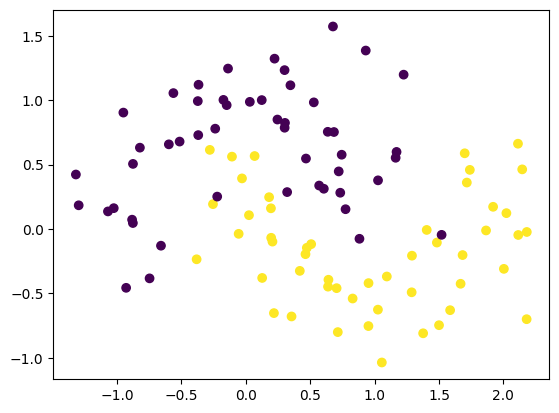

In [204]:

plt.scatter(df['col-0'],df['col-1'],c=df['col-2'])
plt.show()

In [205]:
X=df.iloc[:,0:2].values
y=df['col-2'].values

***

## TanH with Zero weights

In [207]:
model = Sequential()

model.add(Dense(16,activation='tanh',input_dim=2))
model.add(Dense(1,activation='tanh'))

model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_28 (Dense)            (None, 16)                48        
                                                                 
 dense_29 (Dense)            (None, 1)                 17        
                                                                 
Total params: 65
Trainable params: 65
Non-trainable params: 0
_________________________________________________________________


In [208]:
model.get_weights()

[array([[ 0.05126315,  0.24545407, -0.4871968 , -0.46401155,  0.18935484,
         -0.4653973 ,  0.06782657,  0.06297523, -0.37882265, -0.51674813,
          0.48418796,  0.3945223 , -0.19659057, -0.5561647 ,  0.32726878,
         -0.33417732],
        [ 0.45026958,  0.4001152 ,  0.3099447 ,  0.36927474,  0.53428745,
         -0.39355505, -0.47255585, -0.05534577,  0.56427646, -0.14344311,
          0.10495287, -0.17663202,  0.08599102,  0.06712747, -0.1510354 ,
         -0.23231101]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       dtype=float32),
 array([[ 0.47789967],
        [ 0.00196528],
        [-0.43753973],
        [-0.42109966],
        [ 0.21394122],
        [-0.14679426],
        [-0.45698076],
        [ 0.23783803],
        [ 0.06350863],
        [ 0.03685278],
        [ 0.33082354],
        [-0.05180687],
        [-0.11667228],
        [ 0.41409254],
        [-0.39147002],
        [-0.3269828 ]], dtype=float32),
 array([0.],

In [209]:
initial_weights = model.get_weights()

In [210]:
initial_weights[0] = np.zeros(model.get_weights()[0].shape)
initial_weights[1] = np.zeros(model.get_weights()[1].shape)
initial_weights[2] = np.zeros(model.get_weights()[2].shape)
initial_weights[3] = np.zeros(model.get_weights()[3].shape)

In [211]:
model.set_weights(initial_weights)
model.get_weights()

[array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       dtype=float32),
 array([[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.]], dtype=float32),
 array([0.], dtype=float32)]

In [212]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
history = model.fit(X,y,epochs=100,validation_split=0.2)

Epoch 1/100
3/3 [==============================] - 2s 111ms/step - loss: 7.7125 - accuracy: 0.5000 - val_loss: 7.7125 - val_accuracy: 0.5000
Epoch 2/100
3/3 [==============================] - 0s 21ms/step - loss: 7.7125 - accuracy: 0.5000 - val_loss: 7.7125 - val_accuracy: 0.5000
Epoch 3/100
3/3 [==============================] - 0s 20ms/step - loss: 7.7125 - accuracy: 0.5000 - val_loss: 7.7125 - val_accuracy: 0.5000
Epoch 4/100
3/3 [==============================] - 0s 21ms/step - loss: 7.7125 - accuracy: 0.5000 - val_loss: 7.7125 - val_accuracy: 0.5000
Epoch 5/100
3/3 [==============================] - 0s 21ms/step - loss: 7.7125 - accuracy: 0.5000 - val_loss: 7.7125 - val_accuracy: 0.5000
Epoch 6/100
3/3 [==============================] - 0s 21ms/step - loss: 7.7125 - accuracy: 0.5000 - val_loss: 7.7125 - val_accuracy: 0.5000
Epoch 7/100
3/3 [==============================] - 0s 21ms/step - loss: 7.7125 - accuracy: 0.5000 - val_loss: 7.7125 - val_accuracy: 0.5000
Epoch 8/100
3/3 [==

In [213]:
model.get_weights()

[array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       dtype=float32),
 array([[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.]], dtype=float32),
 array([0.], dtype=float32)]

In [214]:
X.shape

(100, 2)

In [215]:
y.shape

(100,)

9600/9600 [==============================] - 20s 2ms/step


<Axes: >

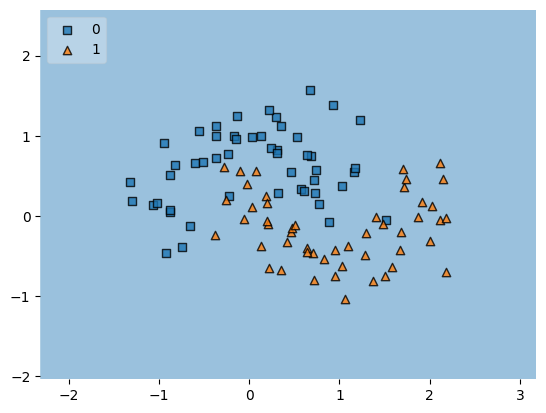

In [216]:
plot_decision_regions(X,y.astype(np.int_), clf=model, legend=2)

***

## Sigmoid with Zero weights

In [217]:
model = Sequential()

model.add(Dense(16,activation='sigmoid',input_dim=2))
model.add(Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_30 (Dense)            (None, 16)                48        
                                                                 
 dense_31 (Dense)            (None, 1)                 17        
                                                                 
Total params: 65
Trainable params: 65
Non-trainable params: 0
_________________________________________________________________


In [218]:
model.get_weights()

[array([[ 0.2076751 , -0.4402841 ,  0.43796468,  0.53793955,  0.4933442 ,
         -0.5349832 , -0.15629092,  0.0939588 , -0.30947545, -0.13013363,
         -0.10699531, -0.31436756,  0.4029774 ,  0.41776824, -0.16919693,
          0.06519854],
        [ 0.4661522 ,  0.49464786,  0.11482602,  0.556183  ,  0.5018045 ,
         -0.16862938, -0.35458505,  0.33021975,  0.54897285, -0.40017027,
         -0.26282537, -0.30702057,  0.4597367 , -0.25723234,  0.01689678,
         -0.2242766 ]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       dtype=float32),
 array([[-0.23268878],
        [-0.49122745],
        [-0.28998628],
        [-0.20823151],
        [ 0.06680506],
        [-0.10486078],
        [-0.46770447],
        [-0.07547438],
        [ 0.15873647],
        [ 0.3879732 ],
        [ 0.33343035],
        [-0.4595878 ],
        [-0.39784902],
        [ 0.26742786],
        [ 0.373711  ],
        [ 0.5303023 ]], dtype=float32),
 array([0.],

In [219]:
initial_weights = model.get_weights()

In [220]:
initial_weights[0] = np.zeros(model.get_weights()[0].shape)
initial_weights[1] = np.zeros(model.get_weights()[1].shape)
initial_weights[2] = np.zeros(model.get_weights()[2].shape)
initial_weights[3] = np.zeros(model.get_weights()[3].shape)

In [221]:
model.set_weights(initial_weights)
model.get_weights()

[array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       dtype=float32),
 array([[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.]], dtype=float32),
 array([0.], dtype=float32)]

In [222]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
history = model.fit(X,y,epochs=100,validation_split=0.2)

Epoch 1/100
3/3 [==============================] - 2s 157ms/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 2/100
3/3 [==============================] - 0s 22ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/100
3/3 [==============================] - 0s 20ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/100
3/3 [==============================] - 0s 24ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/100
3/3 [==============================] - 0s 23ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 6/100
3/3 [==============================] - 0s 22ms/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 7/100
3/3 [==============================] - 0s 20ms/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 8/100
3/3 [==

In [223]:
model.get_weights()

[array([[-0.4321329, -0.4321329, -0.4321329, -0.4321329, -0.4321329,
         -0.4321329, -0.4321329, -0.4321329, -0.4321329, -0.4321329,
         -0.4321329, -0.4321329, -0.4321329, -0.4321329, -0.4321329,
         -0.4321329],
        [ 0.4511592,  0.4511592,  0.4511592,  0.4511592,  0.4511592,
          0.4511592,  0.4511592,  0.4511592,  0.4511592,  0.4511592,
          0.4511592,  0.4511592,  0.4511592,  0.4511592,  0.4511592,
          0.4511592]], dtype=float32),
 array([-0.11510927, -0.11510927, -0.11510927, -0.11510927, -0.11510927,
        -0.11510927, -0.11510927, -0.11510927, -0.11510927, -0.11510927,
        -0.11510927, -0.11510927, -0.11510927, -0.11510927, -0.11510927,
        -0.11510927], dtype=float32),
 array([[-0.04667328],
        [-0.04667328],
        [-0.04667328],
        [-0.04667328],
        [-0.04667328],
        [-0.04667328],
        [-0.04667328],
        [-0.04667328],
        [-0.04667328],
        [-0.04667328],
        [-0.04667328],
        [-0.046

9600/9600 [==============================] - 21s 2ms/step


<Axes: >

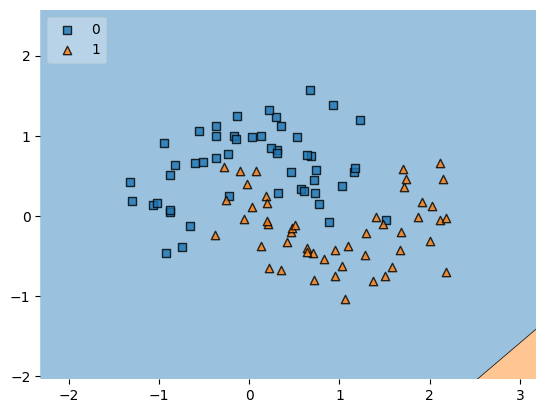

In [224]:
plot_decision_regions(X,y.astype(np.int_), clf=model, legend=2)

***

## ReLU with Zero weights

In [225]:
model = Sequential()

model.add(Dense(16,activation='relu',input_dim=2))
model.add(Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_32 (Dense)            (None, 16)                48        
                                                                 
 dense_33 (Dense)            (None, 1)                 17        
                                                                 
Total params: 65
Trainable params: 65
Non-trainable params: 0
_________________________________________________________________


In [226]:
model.get_weights()

[array([[ 0.08181757,  0.0512805 ,  0.01150626, -0.3683178 , -0.5207992 ,
          0.09809053, -0.47319606,  0.44802868, -0.17864102,  0.32688677,
          0.0138799 , -0.57328296,  0.03189677, -0.4085133 , -0.39393178,
         -0.18166247],
        [ 0.04992586, -0.4500082 ,  0.20636809,  0.17774779,  0.450042  ,
          0.41311634,  0.32124197, -0.43283293,  0.20573968,  0.1003198 ,
          0.51464117, -0.18387094, -0.1831122 , -0.18350548,  0.33469063,
          0.19657189]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       dtype=float32),
 array([[-0.12442705],
        [ 0.36625767],
        [ 0.42534733],
        [ 0.346793  ],
        [-0.36362863],
        [ 0.47202456],
        [ 0.08194965],
        [ 0.3200071 ],
        [ 0.00782102],
        [ 0.07413542],
        [-0.5755823 ],
        [-0.05373734],
        [ 0.09363621],
        [ 0.31153905],
        [ 0.29955262],
        [-0.51076525]], dtype=float32),
 array([0.],

In [227]:
initial_weights = model.get_weights()

In [228]:
initial_weights[0] = np.zeros(model.get_weights()[0].shape)
initial_weights[1] = np.zeros(model.get_weights()[1].shape)
initial_weights[2] = np.zeros(model.get_weights()[2].shape)
initial_weights[3] = np.zeros(model.get_weights()[3].shape)

In [229]:
model.set_weights(initial_weights)
model.get_weights()

[array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       dtype=float32),
 array([[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.]], dtype=float32),
 array([0.], dtype=float32)]

In [230]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
history = model.fit(X,y,epochs=100,validation_split=0.2)

Epoch 1/100
3/3 [==============================] - 2s 140ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 2/100
3/3 [==============================] - 0s 36ms/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/100
3/3 [==============================] - 0s 36ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/100
3/3 [==============================] - 0s 46ms/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/100
3/3 [==============================] - 0s 43ms/step - loss: 0.6932 - accuracy: 0.3500 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 6/100
3/3 [==============================] - 0s 19ms/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 7/100
3/3 [==============================] - 0s 22ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 8/100
3/3 [==

In [231]:
model.get_weights()

[array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       dtype=float32),
 array([[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.]], dtype=float32),
 array([-0.00059182], dtype=float32)]

9600/9600 [==============================] - 18s 2ms/step


<Axes: >

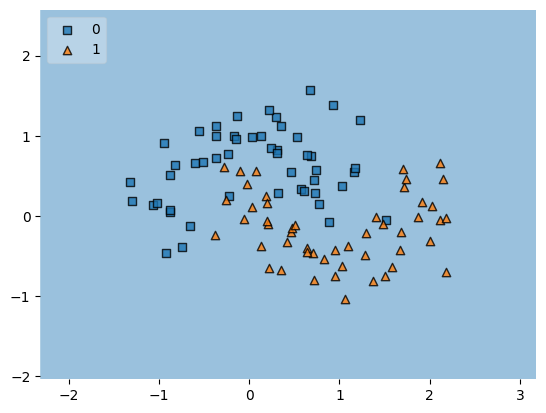

In [232]:
plot_decision_regions(X,y.astype(np.int_), clf=model, legend=2)

***

## TanH with One weights

In [233]:
model = Sequential()

model.add(Dense(16,activation='tanh',input_dim=2))
model.add(Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_34 (Dense)            (None, 16)                48        
                                                                 
 dense_35 (Dense)            (None, 1)                 17        
                                                                 
Total params: 65
Trainable params: 65
Non-trainable params: 0
_________________________________________________________________


In [234]:
model.get_weights()

[array([[-0.38944024,  0.46669865,  0.01346582,  0.21340162,  0.26453775,
          0.56964946, -0.2072891 , -0.18434957, -0.02539122,  0.4994942 ,
          0.07448721, -0.04211199, -0.49999547,  0.08012062,  0.3595602 ,
         -0.1126039 ],
        [-0.19603476,  0.3350426 ,  0.40277612,  0.50159633, -0.21736184,
         -0.4568584 , -0.34805214,  0.5147908 , -0.4674432 ,  0.5428417 ,
         -0.02683532, -0.1849716 , -0.44298455, -0.00368655,  0.0280574 ,
          0.18213862]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       dtype=float32),
 array([[ 0.11898446],
        [-0.45184427],
        [ 0.45393002],
        [-0.3643281 ],
        [-0.3098378 ],
        [-0.0848608 ],
        [ 0.5307435 ],
        [ 0.22038877],
        [ 0.5425612 ],
        [ 0.06089109],
        [ 0.2657556 ],
        [ 0.35840875],
        [ 0.21871215],
        [ 0.3903494 ],
        [-0.53477097],
        [ 0.4191314 ]], dtype=float32),
 array([0.],

In [235]:
initial_weights = model.get_weights()

In [236]:
initial_weights[0] = np.ones(model.get_weights()[0].shape)*0.5
initial_weights[1] = np.ones(model.get_weights()[1].shape)*0.5
initial_weights[2] = np.ones(model.get_weights()[2].shape)*0.5
initial_weights[3] = np.ones(model.get_weights()[3].shape)*0.5

In [237]:
model.set_weights(initial_weights)
model.get_weights()

[array([[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
         0.5, 0.5, 0.5],
        [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
         0.5, 0.5, 0.5]], dtype=float32),
 array([0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5], dtype=float32),
 array([[0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5]], dtype=float32),
 array([0.5], dtype=float32)]

In [238]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
history = model.fit(X,y,epochs=100,validation_split=0.2)

Epoch 1/100
3/3 [==============================] - 1s 99ms/step - loss: 2.8597 - accuracy: 0.5125 - val_loss: 2.0871 - val_accuracy: 0.5500
Epoch 2/100
3/3 [==============================] - 0s 20ms/step - loss: 2.8348 - accuracy: 0.5125 - val_loss: 2.0647 - val_accuracy: 0.6000
Epoch 3/100
3/3 [==============================] - 0s 19ms/step - loss: 2.8092 - accuracy: 0.5125 - val_loss: 2.0428 - val_accuracy: 0.6000
Epoch 4/100
3/3 [==============================] - 0s 20ms/step - loss: 2.7846 - accuracy: 0.5125 - val_loss: 2.0211 - val_accuracy: 0.6000
Epoch 5/100
3/3 [==============================] - 0s 20ms/step - loss: 2.7611 - accuracy: 0.5125 - val_loss: 1.9991 - val_accuracy: 0.6000
Epoch 6/100
3/3 [==============================] - 0s 20ms/step - loss: 2.7361 - accuracy: 0.5125 - val_loss: 1.9779 - val_accuracy: 0.6000
Epoch 7/100
3/3 [==============================] - 0s 19ms/step - loss: 2.7113 - accuracy: 0.5125 - val_loss: 1.9566 - val_accuracy: 0.6000
Epoch 8/100
3/3 [===

In [239]:
model.get_weights()

[array([[0.46762925, 0.46762925, 0.46762925, 0.46762925, 0.46762925,
         0.46762925, 0.46762925, 0.46762925, 0.46762925, 0.46762925,
         0.46762925, 0.46762925, 0.46762925, 0.46762925, 0.46762925,
         0.46762925],
        [0.21802962, 0.21802962, 0.21802962, 0.21802962, 0.21802962,
         0.21802962, 0.21802962, 0.21802962, 0.21802962, 0.21802962,
         0.21802962, 0.21802962, 0.21802962, 0.21802962, 0.21802962,
         0.21802962]], dtype=float32),
 array([0.24227552, 0.24227552, 0.24227552, 0.24227552, 0.24227552,
        0.24227552, 0.24227552, 0.24227552, 0.24227552, 0.24227552,
        0.24227552, 0.24227552, 0.24227552, 0.24227552, 0.24227552,
        0.24227552], dtype=float32),
 array([[0.24106327],
        [0.24106327],
        [0.24106327],
        [0.24106327],
        [0.24106327],
        [0.24106327],
        [0.24106327],
        [0.24106327],
        [0.24106327],
        [0.24106327],
        [0.24106327],
        [0.24106327],
        [0.24106327]

9600/9600 [==============================] - 13s 1ms/step


<Axes: >

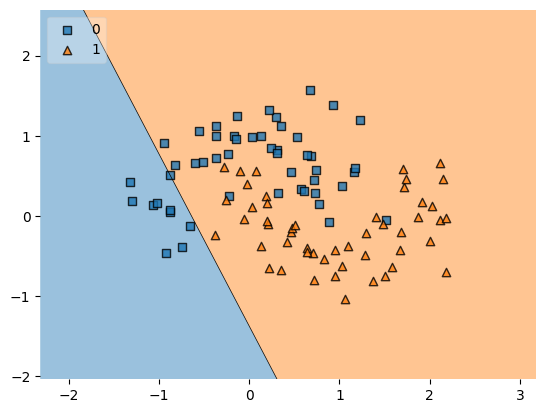

In [240]:
plot_decision_regions(X,y.astype(np.int_), clf=model, legend=2)

***

## Sigmoid with One weights

In [241]:
model = Sequential()

model.add(Dense(16,activation='sigmoid',input_dim=2))
model.add(Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_36 (Dense)            (None, 16)                48        
                                                                 
 dense_37 (Dense)            (None, 1)                 17        
                                                                 
Total params: 65
Trainable params: 65
Non-trainable params: 0
_________________________________________________________________


In [242]:
model.get_weights()

[array([[ 0.01642674, -0.04092711,  0.33624828, -0.26338091, -0.47210255,
         -0.14603892,  0.15534306, -0.30959657, -0.16291866, -0.06911832,
          0.3705606 , -0.26925904, -0.48227635, -0.56442964, -0.5380966 ,
          0.02732056],
        [ 0.20767123, -0.00695854, -0.33727792, -0.42819864,  0.23245293,
          0.25320327,  0.28294307, -0.04389459,  0.22982049,  0.03945148,
         -0.40557992,  0.444116  , -0.0641104 , -0.5475827 ,  0.20796978,
          0.5446739 ]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       dtype=float32),
 array([[-0.5930863 ],
        [ 0.16271311],
        [ 0.48254323],
        [-0.39698854],
        [-0.5105086 ],
        [-0.45438474],
        [-0.1916832 ],
        [ 0.37002534],
        [ 0.02160662],
        [-0.41135994],
        [-0.0171898 ],
        [-0.36227655],
        [-0.04547495],
        [-0.06771427],
        [ 0.26826084],
        [ 0.13103884]], dtype=float32),
 array([0.],

In [243]:
initial_weights = model.get_weights()

In [244]:
initial_weights[0] = np.ones(model.get_weights()[0].shape)*0.5
initial_weights[1] = np.ones(model.get_weights()[1].shape)*0.5
initial_weights[2] = np.ones(model.get_weights()[2].shape)*0.5
initial_weights[3] = np.ones(model.get_weights()[3].shape)*0.5

In [245]:
model.set_weights(initial_weights)
model.get_weights()

[array([[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
         0.5, 0.5, 0.5],
        [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
         0.5, 0.5, 0.5]], dtype=float32),
 array([0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5], dtype=float32),
 array([[0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5]], dtype=float32),
 array([0.5], dtype=float32)]

In [246]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
history = model.fit(X,y,epochs=100,validation_split=0.2)

Epoch 1/100
3/3 [==============================] - 1s 184ms/step - loss: 3.0533 - accuracy: 0.5000 - val_loss: 2.7622 - val_accuracy: 0.5000
Epoch 2/100
3/3 [==============================] - 0s 28ms/step - loss: 3.0321 - accuracy: 0.5000 - val_loss: 2.7428 - val_accuracy: 0.5000
Epoch 3/100
3/3 [==============================] - 0s 27ms/step - loss: 3.0096 - accuracy: 0.5000 - val_loss: 2.7236 - val_accuracy: 0.5000
Epoch 4/100
3/3 [==============================] - 0s 25ms/step - loss: 2.9885 - accuracy: 0.5000 - val_loss: 2.7041 - val_accuracy: 0.5000
Epoch 5/100
3/3 [==============================] - 0s 23ms/step - loss: 2.9662 - accuracy: 0.5000 - val_loss: 2.6843 - val_accuracy: 0.5000
Epoch 6/100
3/3 [==============================] - 0s 22ms/step - loss: 2.9448 - accuracy: 0.5000 - val_loss: 2.6644 - val_accuracy: 0.5000
Epoch 7/100
3/3 [==============================] - 0s 21ms/step - loss: 2.9235 - accuracy: 0.5000 - val_loss: 2.6447 - val_accuracy: 0.5000
Epoch 8/100
3/3 [==

In [247]:
model.get_weights()

[array([[0.40264705, 0.40264705, 0.40264705, 0.40264705, 0.40264705,
         0.40264705, 0.40264705, 0.40264705, 0.40264705, 0.40264705,
         0.40264705, 0.40264705, 0.40264705, 0.40264705, 0.40264705,
         0.40264705],
        [0.24446705, 0.24446705, 0.24446705, 0.24446705, 0.24446705,
         0.24446705, 0.24446705, 0.24446705, 0.24446705, 0.24446705,
         0.24446705, 0.24446705, 0.24446705, 0.24446705, 0.24446705,
         0.24446705]], dtype=float32),
 array([0.2483347, 0.2483347, 0.2483347, 0.2483347, 0.2483347, 0.2483347,
        0.2483347, 0.2483347, 0.2483347, 0.2483347, 0.2483347, 0.2483347,
        0.2483347, 0.2483347, 0.2483347, 0.2483347], dtype=float32),
 array([[0.22042553],
        [0.22042553],
        [0.22042553],
        [0.22042553],
        [0.22042553],
        [0.22042553],
        [0.22042553],
        [0.22042553],
        [0.22042553],
        [0.22042553],
        [0.22042553],
        [0.22042553],
        [0.22042553],
        [0.22042553],


9600/9600 [==============================] - 16s 2ms/step


<Axes: >

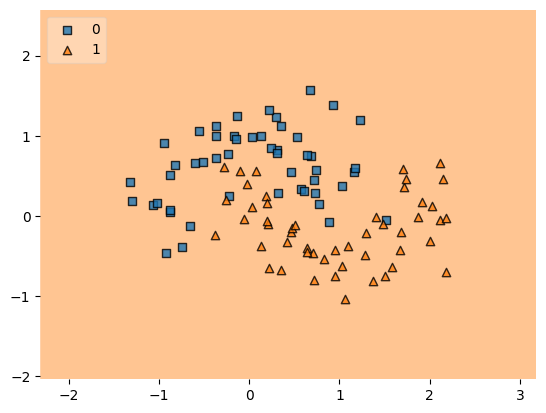

In [248]:
plot_decision_regions(X,y.astype(np.int_), clf=model, legend=2)

***

## ReLU with One weights

In [249]:
model = Sequential()

model.add(Dense(16,activation='relu',input_dim=2))
model.add(Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_38 (Dense)            (None, 16)                48        
                                                                 
 dense_39 (Dense)            (None, 1)                 17        
                                                                 
Total params: 65
Trainable params: 65
Non-trainable params: 0
_________________________________________________________________


In [250]:
model.get_weights()

[array([[ 0.13999575, -0.22553805, -0.16887441, -0.09756458,  0.2718228 ,
          0.03363436,  0.07543814, -0.53170145, -0.46135283, -0.41025704,
         -0.3654694 ,  0.44363308,  0.29104602, -0.296712  ,  0.32113987,
         -0.2947491 ],
        [-0.1807859 , -0.24353948, -0.09794876, -0.21231803,  0.33213103,
         -0.543023  ,  0.5195091 ,  0.11243141,  0.1535384 ,  0.5186653 ,
          0.5634105 ,  0.27799398, -0.5471108 ,  0.04853714, -0.2405113 ,
          0.3561331 ]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       dtype=float32),
 array([[ 0.31090504],
        [-0.33107427],
        [-0.22026339],
        [ 0.27954262],
        [ 0.4211434 ],
        [ 0.4228531 ],
        [ 0.5354717 ],
        [ 0.30969447],
        [-0.21201122],
        [ 0.23718631],
        [ 0.55771816],
        [-0.5079697 ],
        [-0.24402535],
        [-0.5044772 ],
        [-0.30972958],
        [ 0.3490798 ]], dtype=float32),
 array([0.],

In [251]:
initial_weights = model.get_weights()

In [252]:
initial_weights[0] = np.ones(model.get_weights()[0].shape)*0.5
initial_weights[1] = np.ones(model.get_weights()[1].shape)*0.5
initial_weights[2] = np.ones(model.get_weights()[2].shape)*0.5
initial_weights[3] = np.ones(model.get_weights()[3].shape)*0.5

In [253]:
model.set_weights(initial_weights)
model.get_weights()

[array([[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
         0.5, 0.5, 0.5],
        [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
         0.5, 0.5, 0.5]], dtype=float32),
 array([0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5], dtype=float32),
 array([[0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5]], dtype=float32),
 array([0.5], dtype=float32)]

In [254]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
history = model.fit(X,y,epochs=100,validation_split=0.2)

Epoch 1/100
3/3 [==============================] - 1s 114ms/step - loss: 3.8342 - accuracy: 0.5000 - val_loss: 2.6954 - val_accuracy: 0.5000
Epoch 2/100
3/3 [==============================] - 0s 23ms/step - loss: 3.7965 - accuracy: 0.5000 - val_loss: 2.6664 - val_accuracy: 0.5000
Epoch 3/100
3/3 [==============================] - 0s 24ms/step - loss: 3.7526 - accuracy: 0.5000 - val_loss: 2.6380 - val_accuracy: 0.5000
Epoch 4/100
3/3 [==============================] - 0s 22ms/step - loss: 3.7105 - accuracy: 0.5000 - val_loss: 2.6096 - val_accuracy: 0.5000
Epoch 5/100
3/3 [==============================] - 0s 22ms/step - loss: 3.6704 - accuracy: 0.5000 - val_loss: 2.5811 - val_accuracy: 0.5000
Epoch 6/100
3/3 [==============================] - 0s 22ms/step - loss: 3.6282 - accuracy: 0.5000 - val_loss: 2.5529 - val_accuracy: 0.5000
Epoch 7/100
3/3 [==============================] - 0s 24ms/step - loss: 3.5875 - accuracy: 0.5000 - val_loss: 2.5249 - val_accuracy: 0.5000
Epoch 8/100
3/3 [==

In [255]:
model.get_weights()

[array([[0.29886577, 0.29886577, 0.29886577, 0.29886577, 0.29886577,
         0.29886577, 0.29886577, 0.29886577, 0.29886577, 0.29886577,
         0.29886577, 0.29886577, 0.29886577, 0.29886577, 0.29886577,
         0.29886577],
        [0.25052625, 0.25052625, 0.25052625, 0.25052625, 0.25052625,
         0.25052625, 0.25052625, 0.25052625, 0.25052625, 0.25052625,
         0.25052625, 0.25052625, 0.25052625, 0.25052625, 0.25052625,
         0.25052625]], dtype=float32),
 array([0.25959656, 0.25959656, 0.25959656, 0.25959656, 0.25959656,
        0.25959656, 0.25959656, 0.25959656, 0.25959656, 0.25959656,
        0.25959656, 0.25959656, 0.25959656, 0.25959656, 0.25959656,
        0.25959656], dtype=float32),
 array([[0.25407916],
        [0.25407916],
        [0.25407916],
        [0.25407916],
        [0.25407916],
        [0.25407916],
        [0.25407916],
        [0.25407916],
        [0.25407916],
        [0.25407916],
        [0.25407916],
        [0.25407916],
        [0.25407916]

9600/9600 [==============================] - 16s 2ms/step


<Axes: >

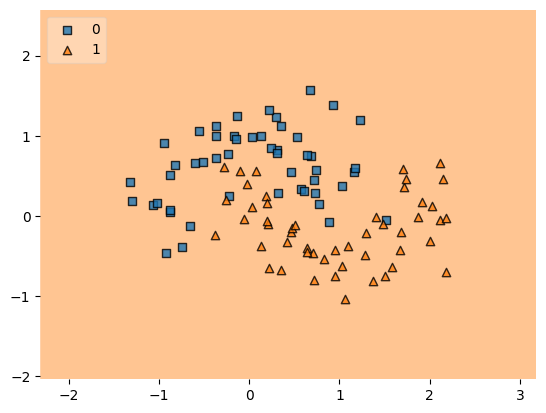

In [256]:
plot_decision_regions(X,y.astype(np.int_), clf=model, legend=2)

***